In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
data=pd.read_csv("C:\\Users\\arzum\\Downloads\\homelessness.csv", index_col=0,)
#Have a look at data
data.describe()
data.columns


Index(['region', 'state', 'individuals', 'family_members', 'state_pop'], dtype='object')

In [2]:
data.dtypes


region             object
state              object
individuals       float64
family_members    float64
state_pop           int64
dtype: object

In [16]:
data=data.to_numpy()


In [4]:
data

array([['East South Central', 'Alabama', 2570.0, 864.0, 4887681],
       ['Pacific', 'Alaska', 1434.0, 582.0, 735139],
       ['Mountain', 'Arizona', 7259.0, 2606.0, 7158024],
       ['West South Central', 'Arkansas', 2280.0, 432.0, 3009733],
       ['Pacific', 'California', 109008.0, 20964.0, 39461588],
       ['Mountain', 'Colorado', 7607.0, 3250.0, 5691287],
       ['New England', 'Connecticut', 2280.0, 1696.0, 3571520],
       ['South Atlantic', 'Delaware', 708.0, 374.0, 965479],
       ['South Atlantic', 'District of Columbia', 3770.0, 3134.0, 701547],
       ['South Atlantic', 'Florida', 21443.0, 9587.0, 21244317],
       ['South Atlantic', 'Georgia', 6943.0, 2556.0, 10511131],
       ['Pacific', 'Hawaii', 4131.0, 2399.0, 1420593],
       ['Mountain', 'Idaho', 1297.0, 715.0, 1750536],
       ['East North Central', 'Illinois', 6752.0, 3891.0, 12723071],
       ['East North Central', 'Indiana', 3776.0, 1482.0, 6695497],
       ['West North Central', 'Iowa', 1711.0, 1038.0, 3148618]

In [5]:
df=pd.DataFrame(data, columns=['region', 'state', 'individuals', 'family_members', 'state_pop'])
df.columns

Index(['region', 'state', 'individuals', 'family_members', 'state_pop'], dtype='object')

In [26]:
reg = LinearRegression().fit(data[:,2:4], data[:,4])

In [27]:
reg.score(data[:,2:4], data[:,4])

0.7036954955265808

In [28]:
reg.coef_

array([352.41918249,  97.88336694])

In [29]:
reg.intercept_

3516062.5883975383

In [31]:
reg.predict(np.array([[1, 1]]))

array([3516512.89094697])

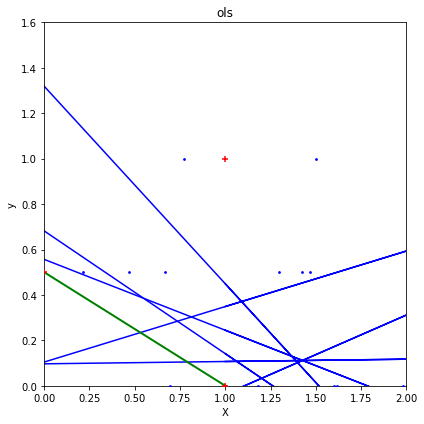

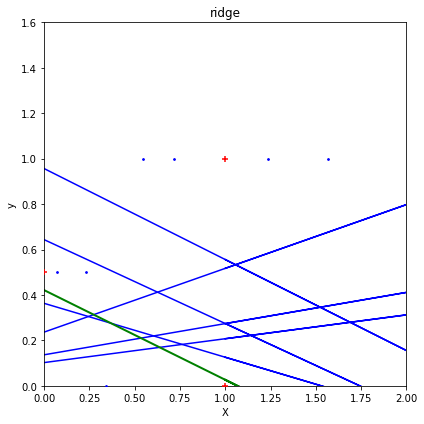

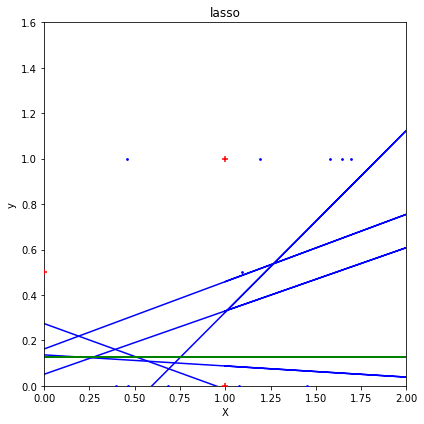

In [43]:
X_train = np.c_[1, 1, 0, 1].T
y_train = [-1, 0, 0.5, 1]
X_test = np.c_[0, 2, 1,1].T

np.random.seed(0)

classifiers = dict(
    ols=linear_model.LinearRegression(), ridge=linear_model.Ridge(alpha=0.2), lasso=linear_model.LassoLars(alpha=.1, normalize=False))

for name, clf in classifiers.items():
    fig, ax = plt.subplots(figsize=(6, 6))

    for i in range(6):
        X = 1.5* np.random.normal(size=(4, 1)) + X_train
        clf.fit(X, y_train)

        ax.plot(X_test, clf.predict(X_test), color="blue")
        ax.scatter(X, y_train, s=3, c="blue", marker="o", zorder=10)

    clf.fit(X_train, y_train)
    ax.plot(X_test, clf.predict(X_test), linewidth=2, color="green")
    ax.scatter(X_train, y_train, s=30, c="red", marker="+", zorder=10)

    ax.set_title(name)
    ax.set_xlim(0, 2)
    ax.set_ylim((0, 1.6))
    ax.set_xlabel("X")
    ax.set_ylabel("y")

    fig.tight_layout()

plt.show()